In [2]:
#Import requirements library
import pandas as pd
import numpy as np

1. READ DATA

In [3]:
#Read excel data
order = pd.read_excel(r"C:\Users\ndqba\Downloads\Sample_Customore_Test_case\Sample_Customore_Order_raw.xlsx", sheet_name='raw')

In [4]:
#View Sample Customore Order
order

,customer_unique_id,order_id,item_quantity,created_day,onsite_original_price,selling_price,shipping_fee,voucher_platform,voucher_seller,payment_method,order_status
0,1,A000000001,1,2019-07-01,338000,259000,3000,0,0,Airpay GIRO,CANCELLED
1,2,A000000002,1,2019-07-01,175000,139000,0,0,0,Cash on Delivery,COMPLETED
2,3,A000000003,1,2019-07-01,520000,359000,14927,0,0,Cybersource,COMPLETED
3,4,A000000004,1,2019-07-01,238000,185000,29645,0,0,Cash on Delivery,COMPLETED
4,5,A000000005,1,2019-07-01,159000,129000,14927,0,0,Cash on Delivery,CANCELLED
...,...,...,...,...,...,...,...,...,...,...,...
61723,30091,A000037831,1,2019-07-30,155000,119000,10000,0,0,Cash on Delivery,COMPLETED
61724,30511,A000037832,1,2019-07-30,475000,399000,10000,0,0,Cash on Delivery,COMPLETED
61725,30512,A000037833,1,2019-07-30,135000,99000,35641,0,0,Cash on Delivery,COMPLETED
61726,30513,A000037834,1,2019-07-30,350000,209000,0,0,0,VN Airpay Ibanking (Techcombank),CANCELLED


2. PRE-PROCESSING DATA

In [5]:
#Checking dataset info
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61728 entries, 0 to 61727
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   customer_unique_id     61728 non-null  int64         
 1   order_id               61728 non-null  object        
 2   item_quantity          61728 non-null  int64         
 3   created_day            61728 non-null  datetime64[ns]
 4   onsite_original_price  61728 non-null  int64         
 5   selling_price          61728 non-null  int64         
 6   shipping_fee           61728 non-null  int64         
 7   voucher_platform       61728 non-null  int64         
 8   voucher_seller         61728 non-null  int64         
 9   payment_method         61728 non-null  object        
 10  order_status           61728 non-null  object        
dtypes: datetime64[ns](1), int64(7), object(3)
memory usage: 5.2+ MB


In [6]:
#Describe dataset
order.describe()

,customer_unique_id,item_quantity,onsite_original_price,selling_price,shipping_fee,voucher_platform,voucher_seller
count,61728.000000,61728.000000,6.172800e+04,6.172800e+04,61728.000000,61728.0,61728.0
mean,14323.092260,1.111748,2.347072e+05,1.514818e+05,11191.105689,0.0,0.0
std,8050.804821,1.487318,1.574884e+05,1.178384e+05,16157.498442,0.0,0.0
min,1.000000,1.000000,1.000000e+03,0.000000e+00,0.000000,0.0,0.0
25%,7954.000000,1.000000,1.500000e+05,8.900000e+04,0.000000,0.0,0.0
50%,13852.500000,1.000000,1.950000e+05,1.250000e+05,3000.000000,0.0,0.0
75%,20361.250000,1.000000,2.580000e+05,1.790000e+05,16000.000000,0.0,0.0
max,30513.000000,198.000000,1.750000e+06,1.579000e+06,384500.000000,0.0,0.0


In [7]:
#Create new dataset base on order
newOrder = order.copy()
newOrder.head(10)

,customer_unique_id,order_id,item_quantity,created_day,onsite_original_price,selling_price,shipping_fee,voucher_platform,voucher_seller,payment_method,order_status
0,1,A000000001,1,2019-07-01,338000,259000,3000,0,0,Airpay GIRO,CANCELLED
1,2,A000000002,1,2019-07-01,175000,139000,0,0,0,Cash on Delivery,COMPLETED
2,3,A000000003,1,2019-07-01,520000,359000,14927,0,0,Cybersource,COMPLETED
3,4,A000000004,1,2019-07-01,238000,185000,29645,0,0,Cash on Delivery,COMPLETED
4,5,A000000005,1,2019-07-01,159000,129000,14927,0,0,Cash on Delivery,CANCELLED
5,6,A000000006,1,2019-07-01,135000,105000,0,0,0,Cash on Delivery,COMPLETED
6,7,A000000007,1,2019-07-01,159000,129000,3000,0,0,Cash on Delivery,COMPLETED
7,7,A000000007,1,2019-07-01,248000,209000,3000,0,0,Cash on Delivery,COMPLETED
8,8,A000000008,1,2019-07-01,199000,169000,40297,0,0,Cash on Delivery,CANCELLED
9,9,A000000009,1,2019-07-01,198000,169000,0,0,0,Cash on Delivery,CANCELLED


In [8]:
#Create weekday column
weekdayList = []
for i in range(len(newOrder)):
    weekdayList.append(newOrder.created_day[i].day_name())

newOrder["weekday"] = weekdayList
#Print newOrder after adding weekday column
newOrder.head(10)

,customer_unique_id,order_id,item_quantity,created_day,onsite_original_price,selling_price,shipping_fee,voucher_platform,voucher_seller,payment_method,order_status,weekday
0,1,A000000001,1,2019-07-01,338000,259000,3000,0,0,Airpay GIRO,CANCELLED,Monday
1,2,A000000002,1,2019-07-01,175000,139000,0,0,0,Cash on Delivery,COMPLETED,Monday
2,3,A000000003,1,2019-07-01,520000,359000,14927,0,0,Cybersource,COMPLETED,Monday
3,4,A000000004,1,2019-07-01,238000,185000,29645,0,0,Cash on Delivery,COMPLETED,Monday
4,5,A000000005,1,2019-07-01,159000,129000,14927,0,0,Cash on Delivery,CANCELLED,Monday
5,6,A000000006,1,2019-07-01,135000,105000,0,0,0,Cash on Delivery,COMPLETED,Monday
6,7,A000000007,1,2019-07-01,159000,129000,3000,0,0,Cash on Delivery,COMPLETED,Monday
7,7,A000000007,1,2019-07-01,248000,209000,3000,0,0,Cash on Delivery,COMPLETED,Monday
8,8,A000000008,1,2019-07-01,199000,169000,40297,0,0,Cash on Delivery,CANCELLED,Monday
9,9,A000000009,1,2019-07-01,198000,169000,0,0,0,Cash on Delivery,CANCELLED,Monday


In [9]:
newOrder["sale_percent"] = round(100-(newOrder["selling_price"]/newOrder["onsite_original_price"]*100))
newOrder.head(10)

,customer_unique_id,order_id,item_quantity,created_day,onsite_original_price,selling_price,shipping_fee,voucher_platform,voucher_seller,payment_method,order_status,weekday,sale_percent
0,1,A000000001,1,2019-07-01,338000,259000,3000,0,0,Airpay GIRO,CANCELLED,Monday,23.0
1,2,A000000002,1,2019-07-01,175000,139000,0,0,0,Cash on Delivery,COMPLETED,Monday,21.0
2,3,A000000003,1,2019-07-01,520000,359000,14927,0,0,Cybersource,COMPLETED,Monday,31.0
3,4,A000000004,1,2019-07-01,238000,185000,29645,0,0,Cash on Delivery,COMPLETED,Monday,22.0
4,5,A000000005,1,2019-07-01,159000,129000,14927,0,0,Cash on Delivery,CANCELLED,Monday,19.0
5,6,A000000006,1,2019-07-01,135000,105000,0,0,0,Cash on Delivery,COMPLETED,Monday,22.0
6,7,A000000007,1,2019-07-01,159000,129000,3000,0,0,Cash on Delivery,COMPLETED,Monday,19.0
7,7,A000000007,1,2019-07-01,248000,209000,3000,0,0,Cash on Delivery,COMPLETED,Monday,16.0
8,8,A000000008,1,2019-07-01,199000,169000,40297,0,0,Cash on Delivery,CANCELLED,Monday,15.0
9,9,A000000009,1,2019-07-01,198000,169000,0,0,0,Cash on Delivery,CANCELLED,Monday,15.0


In [10]:
newOrder.describe()

,customer_unique_id,item_quantity,onsite_original_price,selling_price,shipping_fee,voucher_platform,voucher_seller,sale_percent
count,61728.000000,61728.000000,6.172800e+04,6.172800e+04,61728.000000,61728.0,61728.0,61728.000000
mean,14323.092260,1.111748,2.347072e+05,1.514818e+05,11191.105689,0.0,0.0,37.588372
std,8050.804821,1.487318,1.574884e+05,1.178384e+05,16157.498442,0.0,0.0,23.294592
min,1.000000,1.000000,1.000000e+03,0.000000e+00,0.000000,0.0,0.0,0.000000
25%,7954.000000,1.000000,1.500000e+05,8.900000e+04,0.000000,0.0,0.0,23.000000
50%,13852.500000,1.000000,1.950000e+05,1.250000e+05,3000.000000,0.0,0.0,33.000000
75%,20361.250000,1.000000,2.580000e+05,1.790000e+05,16000.000000,0.0,0.0,45.000000
max,30513.000000,198.000000,1.750000e+06,1.579000e+06,384500.000000,0.0,0.0,100.000000


3. DATA EXPLORATORY

In [11]:
#Import requirements library
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

3.1. TOTAL SELLING BY DAY

In [12]:
#Create dataframe
sellingByDay = pd.DataFrame()
#Daily gross with onsite price
sellingByDay["onsite_original_price"] = newOrder.groupby("created_day")["onsite_original_price"].sum()
#Daily gross with selling price
sellingByDay["selling_price"] = newOrder.groupby("created_day")["selling_price"].sum()
#Daily gross with selling price
sellingByDay["shipping_fee"] = newOrder.groupby("created_day")["shipping_fee"].sum()

sellingByDay

,onsite_original_price,selling_price,shipping_fee
created_day,,,
2019-07-01,175753000,139039400,9249126
2019-07-02,164233000,128637400,6530021
2019-07-03,218898000,170575700,9899283
2019-07-04,157886000,126265400,6768490
2019-07-05,223512000,172225700,9646238
2019-07-07,533773000,409452100,18735404
2019-07-08,259975000,198554000,8600920
2019-07-09,516338000,357230040,25266917
2019-07-10,707896000,453976000,35665750


C:\Users\ndqba\AppData\Local\Temp\ipykernel_1544\1296849511.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values]) #disable scientific notation


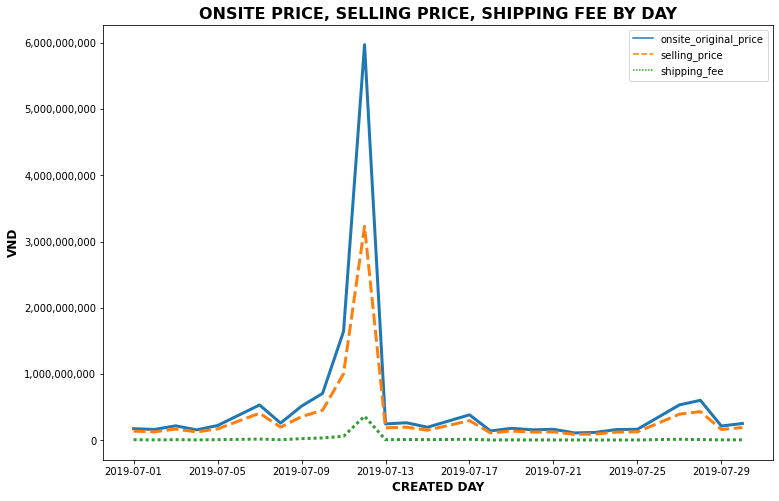

In [40]:
#Plot onsite, selling price and shipping fee
plt.figure(figsize=(12, 8)) #Set figure size
sns.lineplot(data=sellingByDay, linewidth=3) #plot the data
plt.title("ONSITE PRICE, SELLING PRICE, SHIPPING FEE BY DAY", fontsize=16, fontweight="bold") #set title
plt.xlabel("CREATED DAY", fontsize=12, fontweight="bold") #set x axis title
plt.ylabel("VND", fontsize=12, fontweight="bold") #set y axis title
current_values = plt.gca().get_yticks() #get current labels
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values]) #disable scientific notation
plt.savefig("ONSITE_SELLING_SHIPPING_FEE.png")
plt.show()

3.2. TOTAL SELLING PRICE BY WEEKDAYS

In [14]:
sellingByWeekday = pd.DataFrame()
#Weekday gross with onsite price
sellingByWeekday["onsite_original_price"] = newOrder.groupby("weekday", sort=False)["onsite_original_price"].sum()
#Weekday gross with selling price
sellingByWeekday["selling_price"] = newOrder.groupby("weekday", sort=False)["selling_price"].sum()
#Weekday gross with selling price
sellingByWeekday["shipping_fee"] = newOrder.groupby("weekday", sort=False)["shipping_fee"].sum()

sellingByWeekday

,onsite_original_price,selling_price,shipping_fee
weekday,,,
Monday,961461000,744050900,41130098
Tuesday,1054451000,773561370,43942214
Wednesday,1474575000,1045902560,66613646
Thursday,2110011000,1371083910,78998329
Friday,6377397000,3541141700,380269296
Sunday,1569531000,1168339210,48135057
Saturday,940580000,706589430,31715932


C:\Users\ndqba\AppData\Local\Temp\ipykernel_1544\3376997866.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values]) #disable scientific notation


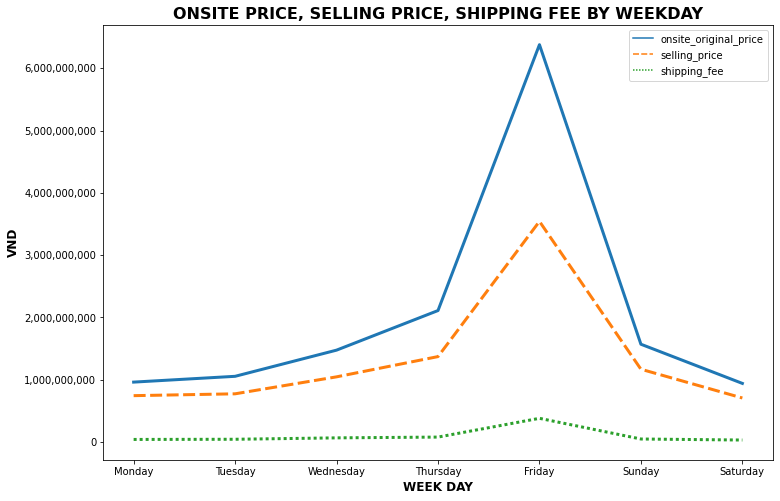

In [41]:
#Plot onsite, selling price and shipping fee
plt.figure(figsize=(12, 8)) #Set figure size
sns.lineplot(data=sellingByWeekday, linewidth=3) #plot the data
plt.title("ONSITE PRICE, SELLING PRICE, SHIPPING FEE BY WEEKDAY", fontsize=16, fontweight="bold") #set title
plt.xlabel("WEEK DAY", fontsize=12, fontweight="bold") #set x axis title
plt.ylabel("VND", fontsize=12, fontweight="bold") #set y axis title
current_values = plt.gca().get_yticks() #get current labels
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values]) #disable scientific notation
plt.savefig("ONSITE_SELLING_SHIPPING_FEE_WEEKDAY.png")
plt.show()

3.3. QUANTITY IN DAY

In [16]:
#Create dataframe
quantityInDay = pd.DataFrame()
#Selling Item by day
quantityInDay["item_count"] = newOrder.groupby("created_day", sort=False)["item_quantity"].sum()
quantityInDay = quantityInDay.reset_index() #reset dataframe index
quantityInDay["created_day"] = quantityInDay["created_day"].dt.strftime('%m-%d') #change created_day format from %Y-%m-%d to %m-%d

quantityInDay

,created_day,item_count
0,07-01,663
1,07-02,592
2,07-03,831
3,07-04,603
4,07-05,857
5,07-07,2053
6,07-08,971
7,07-09,2585
8,07-10,3207
9,07-11,6248


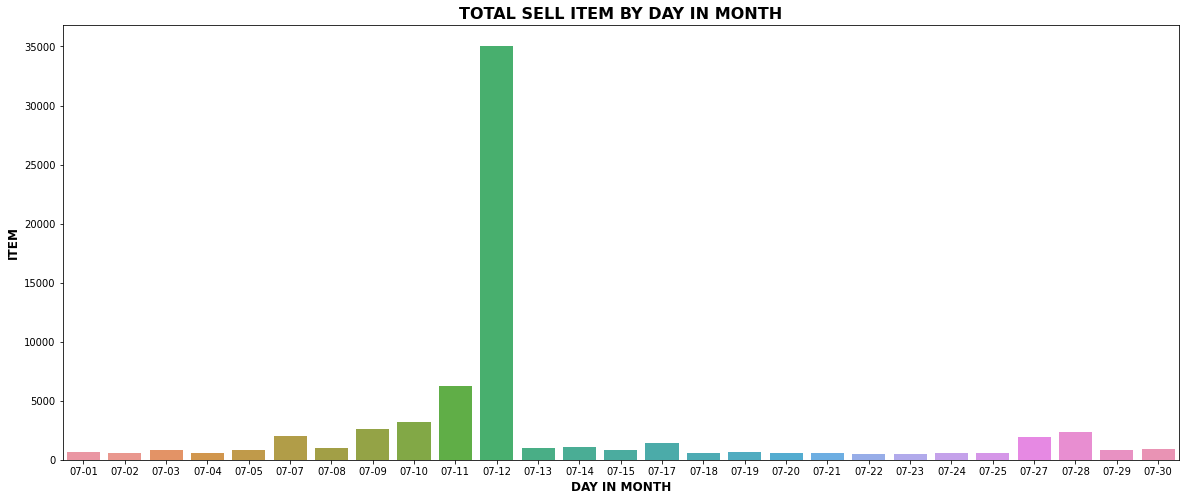

In [42]:
#Plot selling item by day
plt.figure(figsize=(20, 8)) #set plot size
sns.barplot(data=quantityInDay, x="created_day", y="item_count") #bar plot
plt.title("TOTAL SELL ITEM BY DAY IN MONTH", fontsize=16, fontweight="bold") #set title
plt.xlabel("DAY IN MONTH", fontsize=12, fontweight="bold") #set x axis title
plt.ylabel("ITEM", fontsize=12, fontweight="bold") #set y axis title
plt.savefig("TOTAL_SELL_ITEM_BY_DAY_IN_MONTH.png")
plt.show()

3.5. ITEM QUANTITY IN WEEKDAY

In [18]:
#Create dataframe
quantityInWeekDay = pd.DataFrame()

In [19]:
#Count total sell item by weekday
quantityInWeekDay["item_weekday"] = newOrder.groupby("weekday", sort=False)["item_quantity"].sum()
quantityInWeekDay = quantityInWeekDay.reset_index() #reset dataframe index
quantityInWeekDay

,weekday,item_weekday
0,Monday,3762
1,Tuesday,4546
2,Wednesday,6119
3,Thursday,8008
4,Friday,36625
5,Sunday,6030
6,Saturday,3536


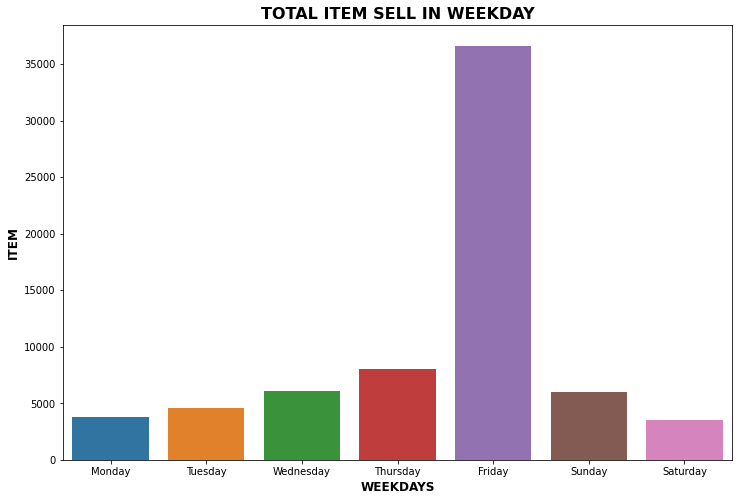

In [43]:
#Plot total sell item by weekday
plt.figure(figsize=(12, 8)) #set plot size
sns.barplot(data=quantityInWeekDay, x="weekday", y="item_weekday")
plt.title("TOTAL ITEM SELL IN WEEKDAY", fontsize=16, fontweight="bold")
plt.xlabel("WEEKDAYS", fontsize=12, fontweight="bold")
plt.ylabel("ITEM", fontsize=12, fontweight="bold")
plt.savefig("TOTAL_SELL_ITEM_BY_WEEK_DAY.png")
plt.show()

3.6. DISCOUNT EFFECT ON DAY IN MONTH GROSS

In [21]:
#Sale percent statistic
newOrder.sale_percent.describe()

count    61728.000000
mean        37.588372
std         23.294592
min          0.000000
25%         23.000000
50%         33.000000
75%         45.000000
max        100.000000
Name: sale_percent, dtype: float64

In [22]:
def salePercentQuery(createdQuery):
    """Function to Query data by day"""
    #Create dataframe
    mostSalePercent = pd.DataFrame()
    #Query data created
    salePercent = newOrder.query(createdQuery)
    #Find out sale_percent has more than 1000 item
    mostSalePercent["count"] = salePercent["sale_percent"].value_counts()
    mostSalePercent = mostSalePercent.loc[mostSalePercent.values>1000]
    mostSalePercent = mostSalePercent.reset_index()
    return mostSalePercent

In [23]:
#Query data by day in 12
salePercent12 = salePercentQuery('created_day=="2019-07-12"')
salePercent12

,index,count
0,49.0,3464
1,40.0,2592
2,47.0,2519
3,99.0,2347
4,50.0,1714
5,43.0,1703
6,100.0,1004


In [24]:
#Query data created_day = 9 10 11 12
salePercent = newOrder.query('created_day=="2019-07-09"')
salePercent = salePercent.append(newOrder.query('created_day=="2019-07-10"'))
salePercent = salePercent.append(newOrder.query('created_day=="2019-07-11"'))
salePercent = salePercent.append(newOrder.query('created_day=="2019-07-12"'))
salePercent

C:\Users\ndqba\AppData\Local\Temp\ipykernel_1544\2242334879.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  salePercent = salePercent.append(newOrder.query('created_day=="2019-07-10"'))
C:\Users\ndqba\AppData\Local\Temp\ipykernel_1544\2242334879.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  salePercent = salePercent.append(newOrder.query('created_day=="2019-07-11"'))
C:\Users\ndqba\AppData\Local\Temp\ipykernel_1544\2242334879.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  salePercent = salePercent.append(newOrder.query('created_day=="2019-07-12"'))


,customer_unique_id,order_id,item_quantity,created_day,onsite_original_price,selling_price,shipping_fee,voucher_platform,voucher_seller,payment_method,order_status,weekday,sale_percent
6196,4279,A000004798,1,2019-07-09,248000,169000,0,0,0,Airpay Wallet V2,COMPLETED,Tuesday,32.0
6197,4280,A000004799,1,2019-07-09,159000,109000,41745,0,0,Cash on Delivery,COMPLETED,Tuesday,31.0
6198,4281,A000004800,1,2019-07-09,150000,1000,0,0,0,Airpay Wallet V2,CANCELLED,Tuesday,99.0
6199,4281,A000004800,1,2019-07-09,148000,109000,0,0,0,Airpay Wallet V2,CANCELLED,Tuesday,26.0
6200,4282,A000004801,1,2019-07-09,238000,199000,3000,0,0,Cash on Delivery,COMPLETED,Tuesday,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47636,21092,A000026823,1,2019-07-12,125000,75000,0,0,0,Cash on Delivery,COMPLETED,Friday,40.0
47637,21688,A000026826,1,2019-07-12,135000,79000,21392,0,0,Shopee Wallet,COMPLETED,Friday,41.0
47638,16680,A000019843,1,2019-07-12,85000,59000,15100,0,0,Cash on Delivery,COMPLETED,Friday,31.0
47639,16680,A000019843,1,2019-07-12,205000,1000,15100,0,0,Cash on Delivery,COMPLETED,Friday,100.0


In [25]:
#Find out sale_percent has more than 1000 item
mostSalePercent = pd.DataFrame()
mostSalePercent["count"] = salePercent["sale_percent"].value_counts()
mostSalePercent = mostSalePercent.loc[mostSalePercent.values>1000]
mostSalePercent = mostSalePercent.reset_index()
mostSalePercent

,index,count
0,49.0,3473
1,99.0,3033
2,40.0,2868
3,47.0,2666
4,43.0,2321
5,50.0,1722
6,100.0,1489
7,34.0,1480
8,36.0,1383
9,32.0,1350


In [47]:
def barPlotSalePercent(df):
    plt.figure(figsize=(12, 8))
    sns.barplot(data=df, x="index", y="count")
    plt.title("DISCOUNT PERCENT HAS MORE THAN 1000 ITEMS", fontsize=16, fontweight="bold")
    plt.xlabel("PERCENT", fontsize=12, fontweight="bold")
    plt.ylabel("ITEM", fontsize=12, fontweight="bold")
    plt.savefig("DISCOUNT_HAS_MORE_THAN_1000.png")
    plt.show()

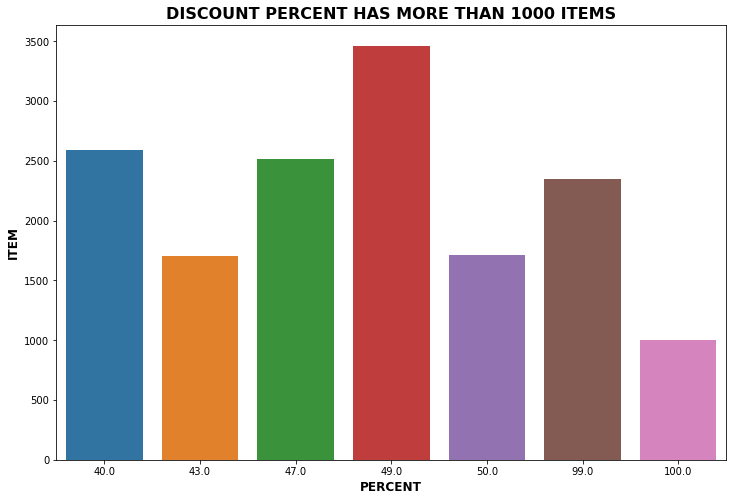

In [48]:
barPlotSalePercent(salePercent12)

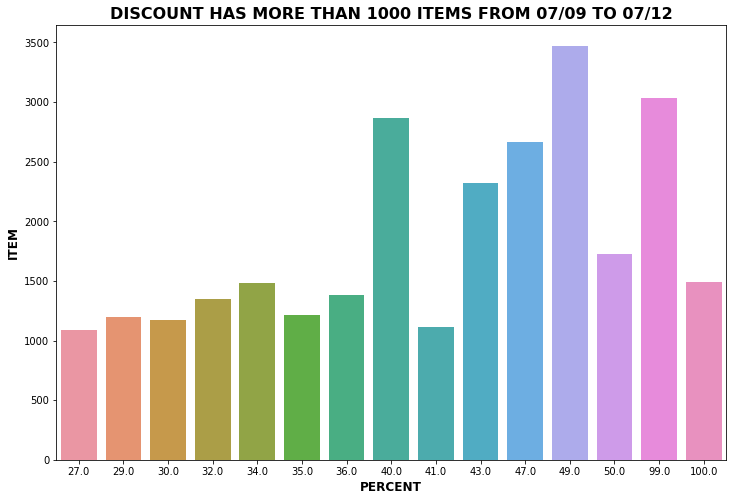

In [46]:
plt.figure(figsize=(12, 8))
sns.barplot(data=mostSalePercent, x="index", y="count")
plt.title("DISCOUNT HAS MORE THAN 1000 ITEMS FROM 07/09 TO 07/12", fontsize=16, fontweight="bold")
plt.xlabel("PERCENT", fontsize=12, fontweight="bold")
plt.ylabel("ITEM", fontsize=12, fontweight="bold")
plt.savefig("DISCOUNT_HAS_MORE_THAN_1000_ITEMS_FROM_9_12.png")
plt.show()

3.7. DISCOUNT EFFECT ON DAY IN WEEKDAY GROSS

In [29]:
#Sale percent has more than 1000 item on Friday
salePercentFri = salePercentQuery('weekday=="Friday"')
salePercentFri

,index,count
0,49.0,3464
1,40.0,2606
2,47.0,2519
3,99.0,2347
4,50.0,1714
5,43.0,1703
6,100.0,1007


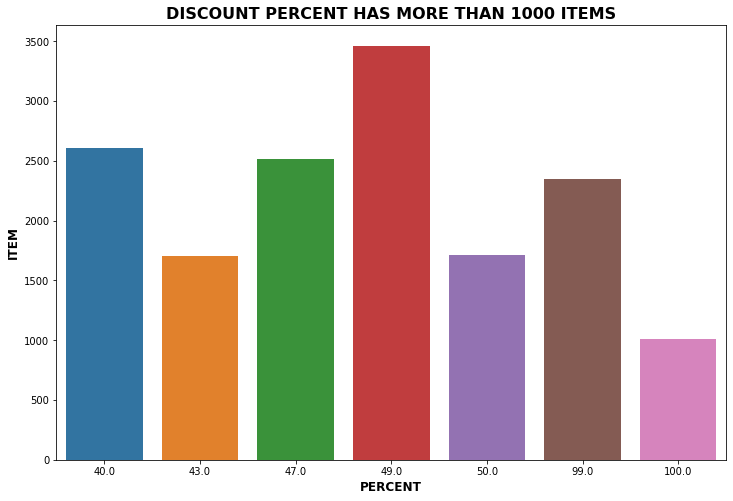

In [49]:
barPlotSalePercent(salePercentFri)

3.8. DOES PAYMENT METHOD AFFECT ORDER STATUS?

In [31]:
#Query data with order_status = COMPLETED
paymentCompleted = newOrder.query('order_status=="COMPLETED"')
paymentCompleted = paymentCompleted.filter(["payment_method", "order_status"])
paymentCompleted["payment_method"].value_counts()

Cash on Delivery                    43570
Airpay GIRO                          2207
Cybersource                          1732
Airpay Wallet V2                     1199
Shopee Wallet                         341
Cybersource (new)                     209
VN Airpay Ibanking (Techcombank)      109
VN Airpay Ibanking (Vietcombank)      101
VN Airpay Ibanking (VPbank)            75
VN Airpay Ibanking (BIDV)              40
VN Airpay Ibanking (ACB)               32
VN Airpay Ibanking (Agribank)          32
VN Airpay Ibanking (Vietinbank)        24
VN Airpay Ibanking (TPbank)            15
VN Airpay Ibanking (DongAbank)         12
VN Airpay Ibanking (Sacombank)          4
VN Airpay Ibanking (MB)                 4
VN Airpay Ibanking (HDbank)             4
VN Airpay Ibanking (OCB)                3
VN Airpay Ibanking (SHB)                3
VN Airpay Ibanking (SEAB)               1
Name: payment_method, dtype: int64

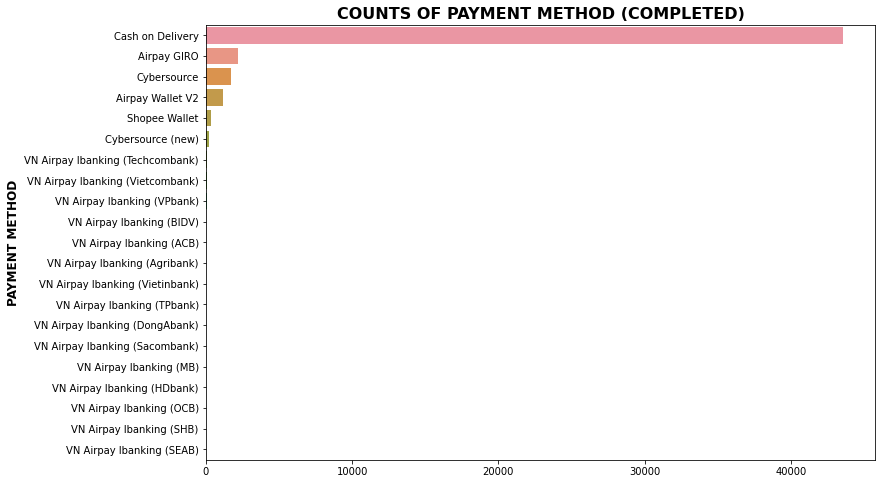

In [52]:
plt.figure(figsize=(12, 8))
sns.countplot(y="payment_method",data=paymentCompleted, order=paymentCompleted["payment_method"].value_counts().index)
plt.title('COUNTS OF PAYMENT METHOD (COMPLETED)', fontsize=16, fontweight='bold')
plt.xlabel("")
plt.ylabel("PAYMENT METHOD", fontsize=12, fontweight='bold')
plt.savefig("COUNTS_OF_PAYMENT_METHOD_COMPLETED_.png", bbox_inches = 'tight')
plt.show()

In [33]:
#Query data with order_status = CANCELLED
paymentCancelled = newOrder.query('order_status == "CANCELLED"')
paymentCancelled = paymentCancelled.filter(["payment_method", "order_status"])
paymentCancelled["payment_method"].value_counts()

Cash on Delivery                    10418
Airpay GIRO                           597
VN Airpay Ibanking (Vietcombank)      207
Airpay Wallet V2                      168
VN Airpay Ibanking (BIDV)              84
VN Airpay Ibanking (Vietinbank)        71
VN Airpay Ibanking (Agribank)          61
VN Airpay Ibanking (Techcombank)       59
Cybersource                            51
Cybersource (new)                      37
VN Airpay Ibanking (VPbank)            36
VN Airpay Ibanking (Sacombank)         32
VN Airpay Ibanking (ACB)               31
VN Airpay Ibanking (DongAbank)         27
Shopee Wallet                          25
VN Airpay Ibanking (MSbank)            22
VN Airpay Ibanking (MB)                22
VN Airpay Ibanking (TPbank)            14
VN Airpay Ibanking (NCB)                7
VN Airpay Ibanking (OCB)                7
VN Airpay Ibanking (Eximbank)           6
VN Airpay Ibanking (Oceanbank)          6
VN Airpay Ibanking (VIB)                6
VN Airpay Ibanking (Indovina)     

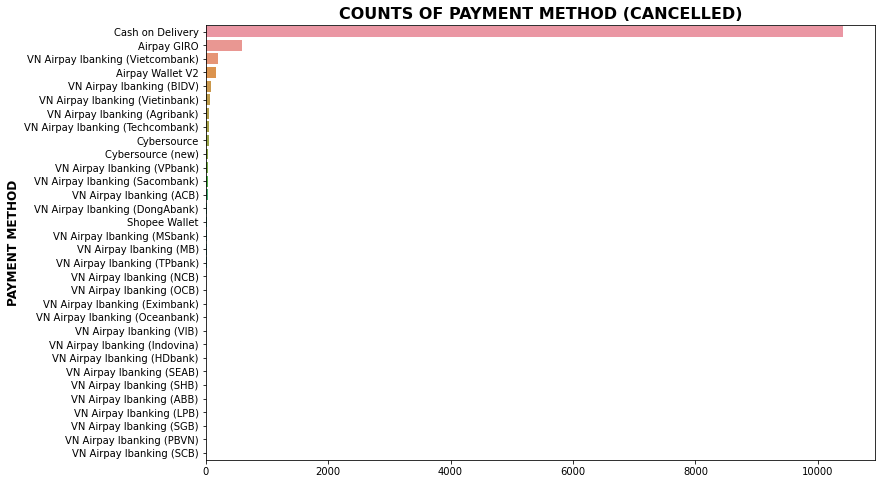

In [53]:
plt.figure(figsize=(12, 8))
sns.countplot(y="payment_method",data=paymentCancelled, order=paymentCancelled["payment_method"].value_counts().index)
plt.title('COUNTS OF PAYMENT METHOD (CANCELLED)', fontsize=16, fontweight='bold')
plt.xlabel("")
plt.ylabel("PAYMENT METHOD", fontsize=12, fontweight='bold')
plt.savefig("COUNTS_OF_PAYMENT_METHOD_CANCELLED.png", bbox_inches = 'tight')
plt.show()

3.9. ORDER CANCELLED RATIO AND SHIPPING FEE

In [35]:
#Create dataframe
orderRatio = pd.DataFrame()
#Query data with 'order_status=="COMPLETED"'
orderRatioCompleted = newOrder.query('order_status=="COMPLETED"')
orderRatioCompleted = orderRatioCompleted.filter(["shipping_fee", "payment_method", "order_status"])
orderRatio["completed"] = orderRatioCompleted["payment_method"].value_counts()
orderRatio["avg_fee_completed"] = orderRatioCompleted.groupby("payment_method")["shipping_fee"].mean()
#Query data with 'order_status=="CANCELLED"'
orderRatioCancelled = newOrder.query('order_status=="CANCELLED"')
orderRatioCancelled = orderRatioCancelled.filter(["shipping_fee", "payment_method", "order_status"])
orderRatio["cancelled"] = orderRatioCancelled["payment_method"].value_counts()
orderRatio["avg_fee_cancelled"] = orderRatioCancelled.groupby("payment_method")["shipping_fee"].mean()

In [36]:
#Compute order ratio
orderRatio["ratio"] = round(orderRatio["cancelled"]/orderRatio["completed"]*100)
orderRatio = orderRatio.reset_index()
orderRatio.rename(columns={"index":"payment_method"}, inplace=True)
orderRatio

,payment_method,completed,avg_fee_completed,cancelled,avg_fee_cancelled,ratio
0,Cash on Delivery,43570,10800.908813,10418,15555.398829,24.0
1,Airpay GIRO,2207,4888.869959,597,7815.058626,27.0
2,Cybersource,1732,8193.934758,51,24195.254902,3.0
3,Airpay Wallet V2,1199,4413.326105,168,18939.535714,14.0
4,Shopee Wallet,341,8701.730205,25,15949.520000,7.0
5,Cybersource (new),209,4653.622010,37,7275.378378,18.0
6,VN Airpay Ibanking (Techcombank),109,8712.311927,59,10780.966102,54.0
7,VN Airpay Ibanking (Vietcombank),101,6965.455446,207,13270.246377,205.0
8,VN Airpay Ibanking (VPbank),75,11205.280000,36,16854.750000,48.0
9,VN Airpay Ibanking (BIDV),40,16104.300000,84,14159.797619,210.0


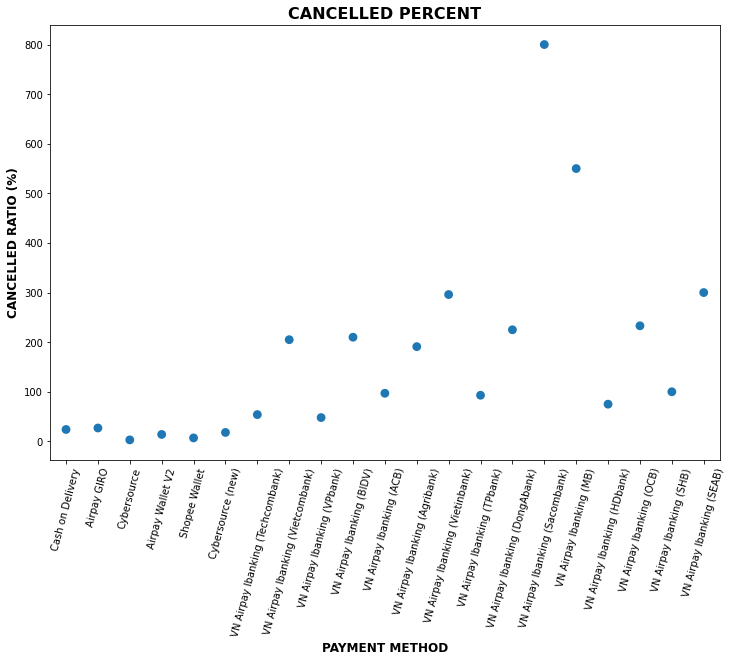

In [54]:
plt.figure(figsize=(12, 8))
sns.pointplot(data=orderRatio, x="payment_method", y="ratio", join=False)
plt.title("CANCELLED PERCENT", fontsize=16, fontweight='bold')
plt.xlabel("PAYMENT METHOD", fontsize=12, fontweight='bold')
plt.ylabel("CANCELLED RATIO (%)", fontsize=12, fontweight='bold')
plt.xticks(rotation=75)
plt.savefig("CANCELLED_PERCENT.png", bbox_inches = 'tight')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


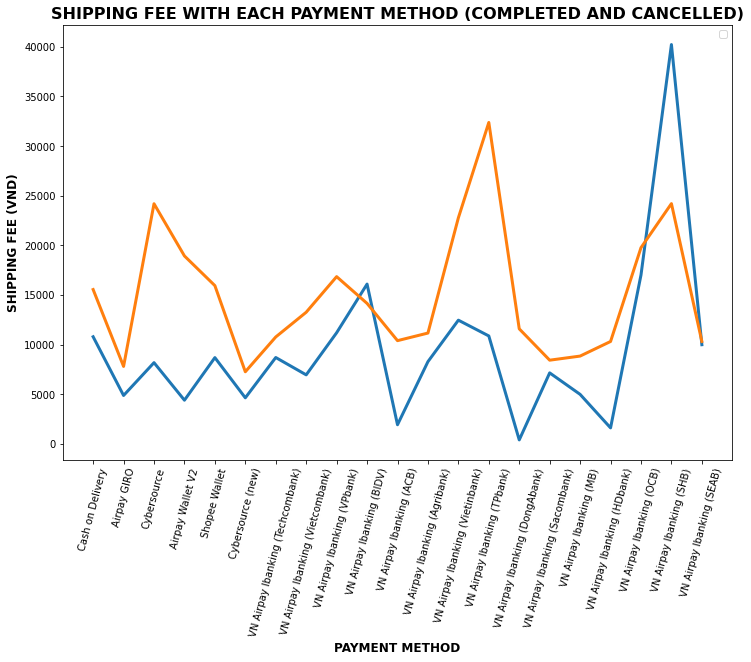

In [55]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=orderRatio, x="payment_method", y="avg_fee_completed", markers=True, dashes=False, linewidth=3)
sns.lineplot(data=orderRatio, x="payment_method", y="avg_fee_cancelled", markers=True, dashes=False, linewidth=3)
plt.title("SHIPPING FEE WITH EACH PAYMENT METHOD (COMPLETED AND CANCELLED)", fontsize=16, fontweight='bold')
plt.xlabel("PAYMENT METHOD", fontsize=12, fontweight='bold')
plt.ylabel("SHIPPING FEE (VND)", fontsize=12, fontweight='bold')
plt.xticks(rotation=75)
plt.legend()
plt.savefig("SHIPPING_FEE.png", bbox_inches = 'tight')
plt.show()

In [39]:
meanFee = orderRatioCancelled.groupby("payment_method")["shipping_fee"].mean()
meanFee

payment_method
Airpay GIRO                          7815.058626
Airpay Wallet V2                    18939.535714
Cash on Delivery                    15555.398829
Cybersource                         24195.254902
Cybersource (new)                    7275.378378
Shopee Wallet                       15949.520000
VN Airpay Ibanking (ABB)            29645.000000
VN Airpay Ibanking (ACB)            10409.935484
VN Airpay Ibanking (Agribank)       11174.557377
VN Airpay Ibanking (BIDV)           14159.797619
VN Airpay Ibanking (DongAbank)      11599.037037
VN Airpay Ibanking (Eximbank)        7719.833333
VN Airpay Ibanking (HDbank)         10325.666667
VN Airpay Ibanking (Indovina)        2000.000000
VN Airpay Ibanking (LPB)                0.000000
VN Airpay Ibanking (MB)              8856.227273
VN Airpay Ibanking (MSbank)         10615.454545
VN Airpay Ibanking (NCB)            15247.857143
VN Airpay Ibanking (OCB)            19771.428571
VN Airpay Ibanking (Oceanbank)      18525.000000
VN Ai